<a href="https://colab.research.google.com/github/NileshCT/Decision_Tree/blob/main/Decision_tree_car_evaluation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
#importing required libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
#importing dataset
df=pd.read_csv("/content/drive/MyDrive/car_evaluation.csv")

**Data understanding**

In [6]:
#checking top 5 records
df.head()

,vhigh,vhigh.1,2,2.1,small,low,unacc
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


In [7]:
col_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']
df.columns = col_names
col_names

['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']

In [8]:
df.tail()

,buying,maint,doors,persons,lug_boot,safety,class
1722,low,low,5more,more,med,med,good
1723,low,low,5more,more,med,high,vgood
1724,low,low,5more,more,big,low,unacc
1725,low,low,5more,more,big,med,good
1726,low,low,5more,more,big,high,vgood


In [9]:
df.shape

(1727, 7)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1727 entries, 0 to 1726
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1727 non-null   object
 1   maint     1727 non-null   object
 2   doors     1727 non-null   object
 3   persons   1727 non-null   object
 4   lug_boot  1727 non-null   object
 5   safety    1727 non-null   object
 6   class     1727 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [11]:
df.columns

Index(['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class'], dtype='object')

In [12]:
df.isnull().sum()

buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
class       0
dtype: int64

**Data preprocessing**

In [13]:
from sklearn import preprocessing
L_Encoder=preprocessing.LabelEncoder()
df["buying"]=L_Encoder.fit_transform(df["buying"])
df["maint"]=L_Encoder.fit_transform(df["maint"])
df['lug_boot']=L_Encoder.fit_transform(df["lug_boot"])
df["safety"]=L_Encoder.fit_transform(df["safety"])
df["class"]=L_Encoder.fit_transform(df["class"])
df["doors"]=L_Encoder.fit_transform(df["doors"])
df["persons"]=L_Encoder.fit_transform(df["persons"])


In [14]:
df.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,3,3,0,0,2,2,2
1,3,3,0,0,2,0,2
2,3,3,0,0,1,1,2
3,3,3,0,0,1,2,2
4,3,3,0,0,1,0,2


In [15]:
df["doors"].unique()

array([0, 1, 2, 3])

In [16]:
df.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,3,3,0,0,2,2,2
1,3,3,0,0,2,0,2
2,3,3,0,0,1,1,2
3,3,3,0,0,1,2,2
4,3,3,0,0,1,0,2


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1727 entries, 0 to 1726
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   buying    1727 non-null   int64
 1   maint     1727 non-null   int64
 2   doors     1727 non-null   int64
 3   persons   1727 non-null   int64
 4   lug_boot  1727 non-null   int64
 5   safety    1727 non-null   int64
 6   class     1727 non-null   int64
dtypes: int64(7)
memory usage: 94.6 KB


**Data splitting**

In [18]:
X_training=df.drop("class",axis=1)
y_training=df["class"]

In [19]:
X_training

,buying,maint,doors,persons,lug_boot,safety
0,3,3,0,0,2,2
1,3,3,0,0,2,0
2,3,3,0,0,1,1
3,3,3,0,0,1,2
4,3,3,0,0,1,0
...,...,...,...,...,...,...
1722,1,1,3,2,1,2
1723,1,1,3,2,1,0
1724,1,1,3,2,0,1
1725,1,1,3,2,0,2


In [20]:
y_training

0       2
1       2
2       2
3       2
4       2
       ..
1722    1
1723    3
1724    2
1725    1
1726    3
Name: class, Length: 1727, dtype: int64

In [21]:
from sklearn.model_selection import train_test_split


In [22]:
# Data splitting using train test split
X_train,X_test,y_train,y_test=train_test_split(X_training,y_training,test_size=0.20,random_state=0)

In [23]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((1381, 6), (346, 6), (1381,), (346,))

**Implimentation of algo to train model with the X_train and Y_train.**

In [53]:
from sklearn.tree import DecisionTreeClassifier
DTC=DecisionTreeClassifier(criterion="gini",max_depth=5,random_state=0,min_samples_split=4)
dtc_gini=DTC.fit(X_train,y_train)

**Decision Tree Classifier with criterion gini**

**Model fitting**

In [54]:
#predicting the X_train and X_train
y_pred_dtc_gini_train=DTC.predict(X_train)

In [55]:
y_pred_dtc_gini=DTC.predict(X_test)

In [56]:
from sklearn.metrics import accuracy_score
r2_score_train=accuracy_score(y_train,y_pred_dtc_gini_train)
r2_score_train

0.8580738595220855

In [57]:
r2_score_test=accuracy_score(y_test,y_pred_dtc_gini)
r2_score_test

0.861271676300578

[Text(0.4583333333333333, 0.9, 'x[3] <= 0.5\ngini = 0.454\nsamples = 1381\nvalue = [307, 55, 970, 49]'),
 Text(0.375, 0.7, 'gini = 0.0\nsamples = 463\nvalue = [0, 0, 463, 0]'),
 Text(0.5416666666666666, 0.7, 'x[5] <= 0.5\ngini = 0.577\nsamples = 918\nvalue = [307, 55, 507, 49]'),
 Text(0.3333333333333333, 0.5, 'x[1] <= 2.5\ngini = 0.618\nsamples = 299\nvalue = [165, 21, 64, 49]'),
 Text(0.16666666666666666, 0.3, 'x[0] <= 0.5\ngini = 0.596\nsamples = 229\nvalue = [133, 21, 26, 49]'),
 Text(0.08333333333333333, 0.1, 'gini = 0.063\nsamples = 61\nvalue = [59, 0, 2, 0]'),
 Text(0.25, 0.1, 'gini = 0.685\nsamples = 168\nvalue = [74, 21, 24, 49]'),
 Text(0.5, 0.3, 'x[0] <= 2.5\ngini = 0.496\nsamples = 70\nvalue = [32, 0, 38, 0]'),
 Text(0.4166666666666667, 0.1, 'gini = 0.453\nsamples = 49\nvalue = [32, 0, 17, 0]'),
 Text(0.5833333333333334, 0.1, 'gini = 0.0\nsamples = 21\nvalue = [0, 0, 21, 0]'),
 Text(0.75, 0.5, 'x[5] <= 1.5\ngini = 0.432\nsamples = 619\nvalue = [142, 34, 443, 0]'),
 Text(0.6

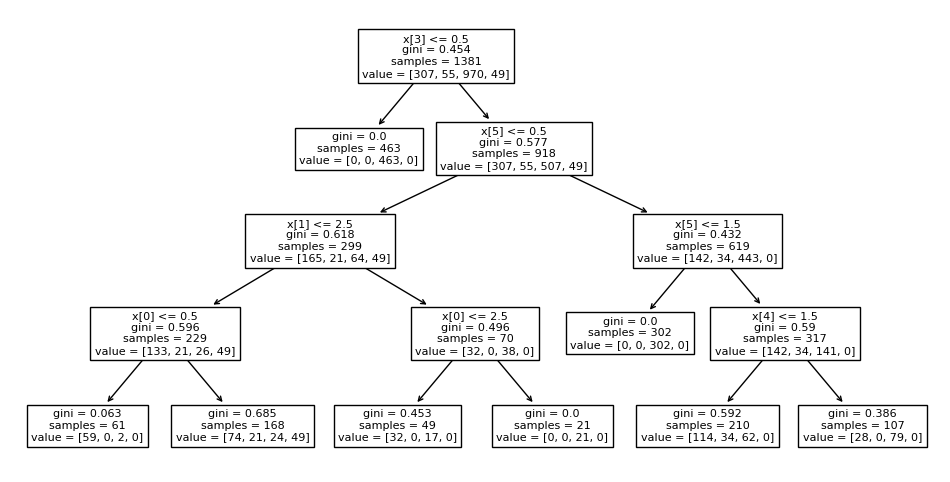

In [29]:
plt.figure(figsize=(12,6))
from sklearn import tree
tree.plot_tree(DTC.fit(X_train,y_train))

**Decision Tree Classifier with criterion entropy**

In [82]:
from sklearn.tree import DecisionTreeClassifier
dt_entropy=DecisionTreeClassifier(criterion="entropy",random_state=0,max_depth=5)


In [83]:
#modelling fitting to train the model.
dt_entropy.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=0)

In [84]:
#predicting the target variable values with predict function
y_pred_train_entropy=dt_entropy.predict(X_train)
y_pred_train_entropy

array([2, 2, 0, ..., 2, 0, 2])

In [85]:
y_pred_test_entropy=dt_entropy.predict(X_test)
y_pred_test_entropy

array([3, 2, 2, 2, 2, 3, 2, 2, 3, 3, 2, 2, 0, 2, 0, 3, 2, 2, 0, 0, 2, 2,
       3, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 3, 2,
       2, 2, 0, 3, 2, 0, 0, 3, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 0, 2, 3, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 2, 0, 2, 2, 0, 0, 3, 2, 0, 0, 2, 3,
       2, 2, 2, 2, 2, 2, 2, 3, 0, 3, 2, 2, 2, 2, 2, 0, 3, 0, 2, 2, 2, 2,
       2, 2, 0, 3, 2, 3, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2,
       3, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 3, 0, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3,
       2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 3, 2, 2, 0, 2, 3, 2, 0, 0, 0, 0, 2, 2, 2, 0,
       2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 3, 0, 2, 0, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 0, 2, 2, 3, 2, 2, 2, 0, 0, 0, 2, 2, 0, 3, 2, 2, 2,
       2, 2, 3, 0, 2, 0, 2, 0, 2, 0, 2, 2, 2, 3, 2,

In [86]:
y_pred_test_entropy.shape

(346,)

In [87]:
#accuracy_score
r2_score=accuracy_score(y_train,y_pred_train_entropy)
r2_score


0.8682114409847936

In [88]:
r2_score_test=accuracy_score(y_test,y_pred_test_entropy)
r2_score_test

0.8583815028901735

In [91]:
#confusion matrix
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred_test_entropy)
cm

array([[ 50,   0,  12,  15],
       [  9,   0,   0,   5],
       [  8,   0, 231,   0],
       [  0,   0,   0,  16]])

In [95]:
#classification report
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_test_entropy))


              precision    recall  f1-score   support

           0       0.75      0.65      0.69        77
           1       0.00      0.00      0.00        14
           2       0.95      0.97      0.96       239
           3       0.44      1.00      0.62        16

    accuracy                           0.86       346
   macro avg       0.54      0.65      0.57       346
weighted avg       0.84      0.86      0.85       346



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
